# 라이브러리 선언

In [1]:
# 스프레드시트의 행과열이 있는 데이터 조작 라이브러리
import pandas as pd
import numpy as np

# 머신러닝 모델 라이브러리
from sklearn import tree, ensemble, svm
from sklearn.tree import plot_tree

# 시각화 라이브러리
import matplotlib.pyplot as plt

# 머신러닝 전처리 라이브러리
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 데이터 불러오기

In [2]:
featureGitUrl = "https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/feature_regression_example.csv"
featuresData = pd.read_csv(featureGitUrl)
featuresData.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442


# 1. 타입 통합/ 특성숫자컬럼 추가

In [3]:
featuresData.PROMOTION.drop_duplicates()

0    Y
9    N
Name: PROMOTION, dtype: object

In [4]:
### 바꿔야 하는 대상이 1,2 -> np.where !!! 전처리 함수를 만든다
def ynVectorFuc(inValue):
    # inValue = "Y"
    if inValue == "Y":
        return 1
    else:
        return 0
### 바꿔야 하는 대상이 3-5 -> dictionary 만들고 map함수로!! 호출!!
ynMap = {"Y":1,"N":0}
featuresData.PROMOTION.map( ynMap )
### 바꿔야 하는 대상이 5개 초과 인경우
### LabelEncoder는  해당 컬럼의 카테코리데이터를 오름차순으로 정렬후
### 인덱스번호로 숫자변환
ynLabel = LabelEncoder()
featuresData["LE_PROMOTION"] = ynLabel.fit_transform(featuresData.PROMOTION)

In [5]:
featuresData.describe()

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,LE_PROMOTION
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,201576.276190,2015.495238,26.752381,1210.238095,2.742857,0.205780,0.761905
std,52.254278,0.502375,15.229514,820.097819,1.587382,0.128636,0.427960
min,201501.000000,2015.000000,1.000000,15.000000,0.000000,0.000000,0.000000
25%,201527.000000,2015.000000,14.000000,542.000000,1.000000,0.208155,1.000000
50%,201553.000000,2015.000000,27.000000,1139.000000,4.000000,0.209442,1.000000
75%,201626.000000,2016.000000,40.000000,1753.000000,4.000000,0.280258,1.000000
max,201652.000000,2016.000000,53.000000,4035.000000,4.000000,0.421888,1.000000


In [6]:
### 테이블정의서 동일하게 타입을 정의해야 한다
### 특성 숫자 컬럼 추가

In [7]:
### np.where, function, loc
### 추가로 Label Encoder, Dictionary map 함수 써서 사용하는 방법!

In [8]:
# featuresData["LE_PROMOTION"] = np.where( featuresData.PROMOTION=="Y",1,0)
# featuresData["LE_HOLIDAY"] = np.where( featuresData.HOLIDAY=="Y",1,0)

In [9]:
ynDict = {"Y":1,"N":0}
featuresData["LE_PROMOTION"] = featuresData.PROMOTION.map( ynDict )
featuresData["LE_HOLIDAY"] = featuresData.HOLIDAY.map( ynDict )

In [10]:
## 라벨 인코더
ynLabel = LabelEncoder()
featuresData["LE_PROMOTION"] = ynLabel.fit_transform(featuresData.PROMOTION)
# 각 데이터가 라벨링된 내용 확인 (카테고리 데이터를 정렬 오름차순 후 인덱싱)
ynLabel.classes_
featuresData["LE_INV_PROMOTION"] = ynLabel.inverse_transform( featuresData.LE_PROMOTION )
featuresData = featuresData.drop(columns=["LE_INV_PROMOTION"] )

# 2. 특성 선정 및 데이터 분리

In [11]:
### 특성 선정

In [12]:
# 시뮬레이션 시 아래 방법 활용
# simulCorrList = [0.3, 0.4, 0.5, 0.6, 0.7]
# for i in range(0, len(simulCorrList)):

In [13]:
corrDf = featuresData.corr(method="pearson", numeric_only=True)
# 기준이 되는 상관계수를 어떻게 설정하느냐에 따라서
stdCorr = 0.3
label = ["QTY"]
features = list( corrDf.loc[ (abs( corrDf.QTY) >= stdCorr) &
                            (abs( corrDf.QTY) != 1)    ].index )
print( f"문제지 {features}, 정답지: {label} " )
### 데이터 분리 (시계열 데이터 접근하는 방법)
### 다양한 데이터 분리 방법
# 특정 시점으로 구분해서 시뮬레이션
splitRatio = 0.8
splitIndex = int( featuresData.shape[0] * splitRatio )
targetColumns = ["YEARWEEK"]
splitYearweek = featuresData.loc[ splitIndex, targetColumns ].values[0]

testData = featuresData.loc[ featuresData.YEARWEEK > splitYearweek ]
trainData = featuresData.loc[ featuresData.YEARWEEK <= splitYearweek ]
testData = featuresData.loc[ featuresData.YEARWEEK > splitYearweek ]

# TrainTestSplit 함수 활용 데이터 분리
# trainData, testData = train_test_split( featuresData, test_size = 0.2, random_state = 255)

trainingDataFeatures = trainData.loc[ :, features]
trainingDataLabel = trainData.loc[ :, label]
testDataFeatures = testData.loc[ :, features]
testDataLabel = testData.loc[ :, label]

print(trainingDataFeatures.shape)
print(trainingDataLabel.shape)
print(testDataFeatures.shape)
print(testDataLabel.shape)
### featuresData 연도로 구분한다  구분!
### TrainData = 2015 TestData = 2016
### trainingDataFeatures
### testDataFeatures
### trainingDataLabel
### testDataLabel
### 데이터 분리 (쉽게 접근하는 방법)
# trainData, testData = train_test_split( featuresData, test_size=0.2, random_state=1 )
# ## 훈련, 테스트데이터 내부에서 문제지 정답지 분리
# trainingDataFeatures = trainData.loc[ :, features]
# trainingDataLabel = trainData.loc[ :, label]
# testDataFeatures = testData.loc[ :, features]
# testDataLabel = testData.loc[ :, label]
# print(trainingDataFeatures.shape)
# print(trainingDataLabel.shape)
# print(testDataFeatures.shape)
# print(testDataLabel.shape)


문제지 ['HCLUS', 'PRO_PERCENT', 'LE_PROMOTION', 'LE_HOLIDAY'], 정답지: ['QTY'] 
(85, 4)
(85, 1)
(20, 4)
(20, 1)


# 3. 모델 적용

In [14]:
from sklearn import ensemble

In [15]:
rfModel = ensemble.RandomForestRegressor(n_estimators=5, random_state=1 )
fittedRfModel = rfModel.fit( trainingDataFeatures, trainingDataLabel)

# fig = plt.figure( figsize = (25,15))
# plot_tree( fittedRfModel.estimators_[2] )
# ## 트리 이미지 저장
# plt.savefig("aa.png")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [16]:
dtModel = tree.DecisionTreeRegressor( random_state= 1)
fittedDtModel = dtModel.fit( trainingDataFeatures, trainingDataLabel )

In [17]:
# # 예측 시뮬레이션
# inHclus = 0
# inPropercent = 0.25
# inPromotion = 0
# inHoliday = 0
# testDf = pd.DataFrame( [[ inHclus,inPropercent, inPromotion, inHoliday   ]])
# fittedDtModel.predict( testDf )
### 트리분석
# depth1 = trainData.loc[trainData.PRO_PERCENT <= 0.259]
# depth2 = depth1.loc[depth1.LE_PROMOTION <= 0.5 ]
# depth3 = depth2.loc[depth2.LE_HOLIDAY <= 0.5]
# depth3.QTY.mean()
# fig = plt.figure( figsize = (25,15))
# plot_tree( fittedDtModel )
# ## 트리 이미지 저장
# plt.savefig("aa.png")

# 4. 예측

In [18]:
rfPredictValue = fittedRfModel.predict( testDataFeatures )
dtPredictValue = fittedDtModel.predict( testDataFeatures )

In [19]:
# 5. 데이터 정리
testDataLabel["PREDICT_DT"] = dtPredictValue
testDataLabel["PREDICT_RF"] = rfPredictValue

In [20]:
resultDf = testDataLabel.reset_index()

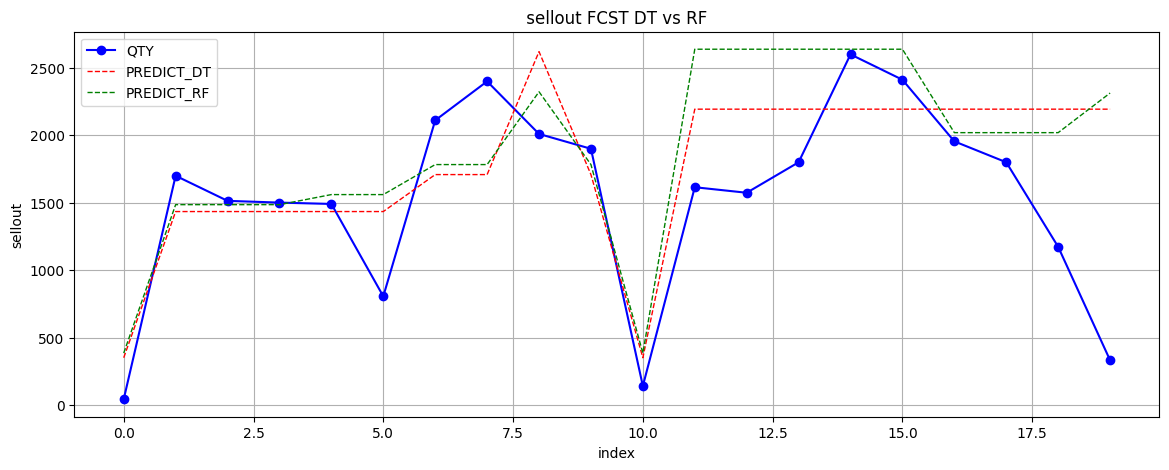

In [21]:
fig = plt.figure(figsize=(14,5))
plt.plot(resultDf.QTY, "bo-", lw=1.5, label="QTY")
plt.plot(resultDf.PREDICT_DT, "r--", lw=1, label="PREDICT_DT")
plt.plot(resultDf.PREDICT_RF, "g--", lw=1, label="PREDICT_RF")
plt.ylabel("sellout")
plt.xlabel("index")
plt.grid(True)
plt.title(" sellout FCST DT vs RF ")
plt.legend()
# X축 눈금 형식 설정

In [22]:
# 정확도 검증
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
maeDt = mean_absolute_error( testDataLabel.QTY, testDataLabel.PREDICT_DT )
rmseDt = np.sqrt( mean_squared_error( testDataLabel.QTY, testDataLabel.PREDICT_DT ) )
mean_absolute_percentage_error( testDataLabel.QTY, testDataLabel.PREDICT_DT )
print( stdCorr, maeDt, rmseDt)
# accuracyMatrix = pd.DataFrame( [ [stdCorr, maeDt, rmseDt]], columns = ["CORR_STD","MAE_DT", "RMSE_DT"] )
# accuracyMatrix

0.3 462.0403571428572 611.3204622610646


### 디버깅

In [23]:
# # dsimulCorrList[3]
# i=3